In [ ]:
!git clone https://gitlab.com/AmosEgel/smuthi

Cloning into 'smuthi'...
remote: Enumerating objects: 6742, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 6742 (delta 45), reused 104 (delta 45), pack-reused 6638
Receiving objects: 100% (6742/6742), 37.50 MiB | 16.92 MiB/s, done.
Resolving deltas: 100% (4561/4561), done.


In [ ]:
!git clone https://gitlab.com/k.czajkowski/addatmatrix

Cloning into 'addatmatrix'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 102 (delta 28), reused 0 (delta 0), pack-reused 50
Receiving objects: 100% (102/102), 22.21 KiB | 7.40 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [ ]:
# apt install opencl-headers ocl-icd-opencl-dev libclfft-dev libclblas-dev

In [ ]:
!apt-get install libfftw3-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfftw3-bin libfftw3-double3 libfftw3-long3 libfftw3-quad3 libfftw3-single3
Suggested packages:
  libfftw3-doc
The following NEW packages will be installed:
  libfftw3-bin libfftw3-dev libfftw3-double3 libfftw3-long3 libfftw3-quad3 libfftw3-single3
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,654 kB of archives.
After this operation, 24.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-double3 amd64 3.3.8-2ubuntu8 [770 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-long3 amd64 3.3.8-2ubuntu8 [335 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-quad3 amd64 3.3.8-2ubuntu8 [614 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfftw3-single3 amd64 3.3.8-2ubuntu8 [800 kB]
Get:5 http://archive.ub

In [ ]:
!cd smuthi && pip install .

Processing /content/smuthi
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for SMUTHI: filename=SMUTHI-2.1.2-cp310-cp310-linux_x86_64.whl size=2489798 sha256=6cdfbf17e1be020721ef36dd5ee33c8af31bf89d809cd2ba46c2d6e9afb68fa8
  Stored in directory: /tmp/pip-ephem-wheel-cache-u0110vii/wheels/f3/6b/ff/03bfb147083b16dcb77e30138986ba802c4092729b125e9902
  Created wheel for pywigxjpf: filename=pywigxjpf-1.11-cp310-cp310-linux_x86_64.whl size=90892 sha256=2f4d6006e123e116beb384be68a1c87bd87eb4f0013f22117f5da10878c7eb9e
  Stored in directory: /root/.cache/pip/wheels/b0/e8/cb/3cbc2934a5db1112bdcd19fee3ad65a75fa580af8e5c1fc960
Successfully built SMUTHI pywigxjpf


In [ ]:
!cd addatmatrix && pip install .

Processing /content/addatmatrix
  Preparing metadata (setup.py) ... done
  Created wheel for addatmatrix: filename=addatmatrix-0.1.0-cp310-cp310-linux_x86_64.whl size=237897 sha256=096c147806e3dff5f480d58d845b3df15d8f3d1d4e418eade00c1c18bcedd868
  Stored in directory: /tmp/pip-ephem-wheel-cache-ov091pfm/wheels/f7/5a/29/a386d465a4bc8abf4cc0f7cda4ed8d7b646269c3a31104f9b1
Successfully built addatmatrix


In [ ]:
from addatmatrix.t_matrix import t_matrix_spheroid

/usr/local/lib/python3.10/dist-packages/addatmatrix/t_matrix.py:21: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(parallel=True)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from smuthi.simulation import Simulation
from smuthi.initial_field import PlaneWave
from smuthi.layers import LayerSystem
from smuthi.particles import Sphere, Spheroid, FiniteCylinder, CustomParticle
from smuthi.postprocessing.far_field import total_scattering_cross_section
from smuthi.postprocessing.far_field import extinction_cross_section
from smuthi.utility.automatic_parameter_selection import select_numerical_parameters
from smuthi.utility.optical_constants import  read_refractive_index_from_yaml

# In this file, all lengths are given in micrometers

# Layer system (glass substrate under vacuum)
layers = LayerSystem(thicknesses=[0, 0],
                     refractive_indices=[1., 1])

# Particle
semi_c = 0.300
semi_a = 0.300
refractive_index = 1.5
particle = Spheroid(position=[0, 0, semi_c],
                    refractive_index=refractive_index,
                    semi_axis_c=semi_c,
                    semi_axis_a=semi_a,
                    l_max=2,
                    m_max=2)

# Initial field
plane_wave = PlaneWave(vacuum_wavelength=0.4,
                       polar_angle=np.pi,
                       azimuthal_angle=0,
                       polarization=0)

# Simulation
simulation = Simulation(layer_system=layers,
                        particle_list=[particle],
                        initial_field=plane_wave)


# Launch --------------------------------------------------------
wavelengths = np.arange(0.53, 0.55, 0.005)
scs_list = []
ecs_list = []
for wl in wavelengths:
    print("running wl = ", wl)
    simulation.k_parallel = "default"
    simulation.initial_field.vacuum_wavelength = wl
    simulation.run()
    scs = total_scattering_cross_section(simulation)
    ecs = extinction_cross_section(simulation)
    scs_list.append(scs.real)
    ecs_list.append(ecs.real)

np.savetxt("results.dat", np.transpose([wavelengths, ecs_list, scs_list]), header="wl(mum) ecs(mum2) scs(mum2)")

# Plot
plt.figure(figsize=(4,3))
plt.plot(wavelengths, scs_list)
#plt.plot(benchmark_data[:, 0], benchmark_data[:, 2], ".")
plt.xlabel("wavelength (micron)")
plt.ylabel("cross section (square micron)")
plt.legend(["SCS (smuthi)", "SCS (FDTD)"])
plt.tight_layout()
plt.savefig("SCS.png")
plt.show()

running wl =  0.53
Evaluating scattered field plane wave expansion in layer number 1 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
Evaluating scattered field plane wave expansion in layer number 0 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
Evaluating scattered field plane wave expansion in layer number 1 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
Evaluating scattered field plane wave expansion in layer number 0 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
running wl =  0.535
Evaluating scattered field plane wave expansion in layer number 1 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
Evaluating scattered field plane wave expansion in layer number 0 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
Evaluating scattered field plane wave expansion in layer number 1 ...
Scatt. fi

In [ ]:
ar = semi_c / semi_a
x = 2*np.pi*semi_a/wl
lmax = 2
ar, x

(1.0, 3.4271919857343196)

In [ ]:
6.8543 / 2 / 6.2831 * wl, semi_a

(0.30000039789276, 0.3)

In [ ]:
T = t_matrix_spheroid(rad=x,ar=ar,n=refractive_index,lmax=lmax)

100%|██████████| 20/20 [04:10<00:00, 12.53s/it]


In [ ]:
T

array([[-9.82865239e-01+1.60690004e-01j, -6.90661000e-03+1.07089931e-04j,
        -7.28860362e-03+1.60823994e-02j,  3.57387251e-03-6.44108190e-03j,
         2.50693384e-03-2.39889934e-04j,  1.31170780e-03+3.48851383e-04j,
        -4.27776070e-03+1.99832580e-04j, -9.27481840e-03+8.43117146e-03j,
         6.01967640e-04+6.47236994e-03j, -2.36371962e-02-8.92695354e-03j,
        -6.69836235e-04+5.05611950e-03j,  8.78525740e-04-3.34956836e-03j,
         5.36539915e-03-4.44532277e-05j, -9.30855139e-04-9.52343866e-04j,
        -8.71016141e-03-3.08141673e-03j,  4.90361686e-04+3.14769381e-03j],
       [-1.40310707e-03-3.54366906e-03j, -9.90234756e-01+1.57067235e-01j,
        -4.60548931e-04+4.74547054e-04j,  1.31754949e-03+2.90283635e-03j,
         5.79939553e-03-5.37060647e-03j, -2.65578320e-03-1.96452937e-03j,
        -4.61341918e-03+5.77482306e-03j,  8.45481923e-04+1.28556353e-03j,
         9.15006763e-03+7.88532270e-03j,  2.53787152e-03-1.37105971e-03j,
         8.08146874e-03+8.43983937e-0

In [ ]:
T[0,0]

(-0.9828652394256833+0.16069000427095625j)

In [ ]:
Ttst=particle.compute_t_matrix(wl,1)

In [ ]:
Ttst[0,0]

(-0.9793514547750295+0.142204721458406j)

In [ ]:
T[1,1]

(-0.990234755941577+0.15706723508970113j)

In [ ]:
Ttst[1,1]

(-0.9793514547750295+0.14220472145840604j)

In [ ]:
np.diag(T)

array([-0.98286524+0.16069j   , -0.99023476+0.15706724j,
       -0.98793978+0.15592804j, -0.99241226-0.06238571j,
       -0.99653763-0.0662209j , -0.99550868-0.06651184j,
       -0.99480563-0.0665841j , -0.99970966-0.0651528j ,
       -0.96129875-0.20892364j, -0.90558416-0.21610178j,
       -0.95037098-0.19996848j, -0.90767243+0.2806654j ,
       -0.91448961+0.27513765j, -0.91029851+0.28408149j,
       -0.91600509+0.27803449j, -0.9132407 +0.2823347j ])

In [ ]:
np.diag(Ttst)

array([-0.97935145+0.14220472j, -0.97935145+0.14220472j,
       -0.97935145+0.14220472j, -0.99522258-0.06895356j,
       -0.99522258-0.06895356j, -0.99522258-0.06895356j,
       -0.99522258-0.06895356j, -0.99522258-0.06895356j,
       -0.9530576 -0.21151552j, -0.9530576 -0.21151552j,
       -0.9530576 -0.21151552j, -0.91576713+0.27773673j,
       -0.91576713+0.27773673j, -0.91576713+0.27773673j,
       -0.91576713+0.27773673j, -0.91576713+0.27773673j])

In [ ]:
wl

0.55

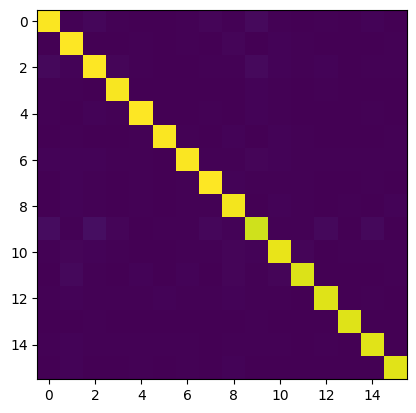

In [ ]:
plt.imshow(np.abs(T))

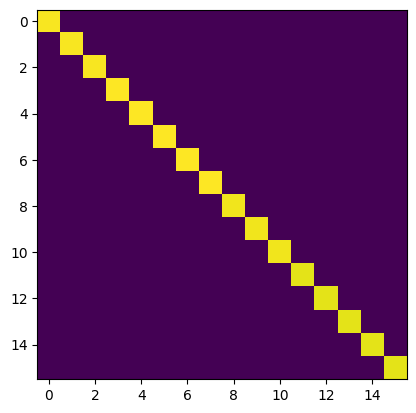

In [ ]:
plt.imshow(np.abs(Ttst))